<a href="https://colab.research.google.com/github/Ken3-K/shared/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 5.1 MB/s 
     |████████████████████████████████| 5.5 MB 60.5 MB/s 
     |████████████████████████████████| 163 kB 40.9 MB/s 
     |████████████████████████████████| 7.6 MB 36.1 MB/s 


# text to image

In [ ]:
! huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from IPython.display import Image, display
import matplotlib.pyplot as plt

# model_id = "CompVis/stable-diffusion-v1-4"
model_id = "hakurei/waifu-diffusion"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)
pipe = pipe.to(device)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/215 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/730 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/812 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/708 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


# Image to image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['_ hair long _ hair looking _ at _ viewer neck _ ribbon pleated _ skirt ribbon shirt shirt _ tucked _ in short _ sleeves simple _ background skirt smile solo thighhighs white _ background white _ shirt <|endoftext|>']


  0%|          | 0/50 [00:00<?, ?it/s]

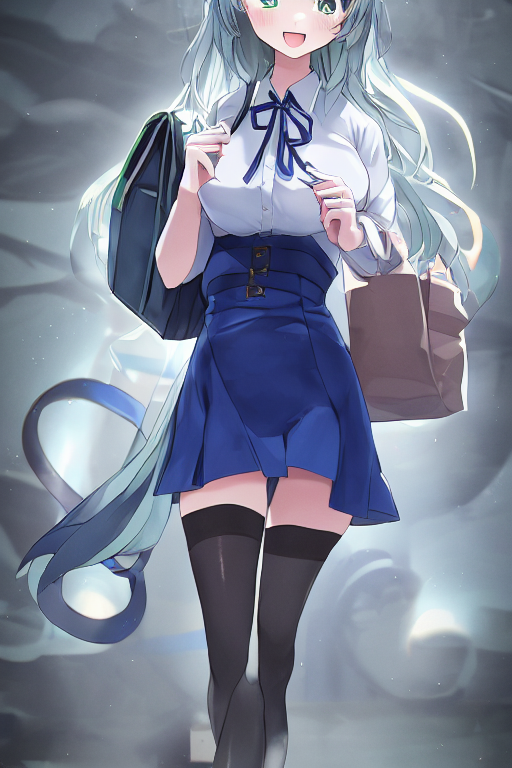

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['_ hair long _ hair looking _ at _ viewer neck _ ribbon pleated _ skirt ribbon shirt shirt _ tucked _ in short _ sleeves simple _ background skirt smile solo thighhighs white _ background white _ shirt <|endoftext|>']


  0%|          | 0/50 [00:00<?, ?it/s]

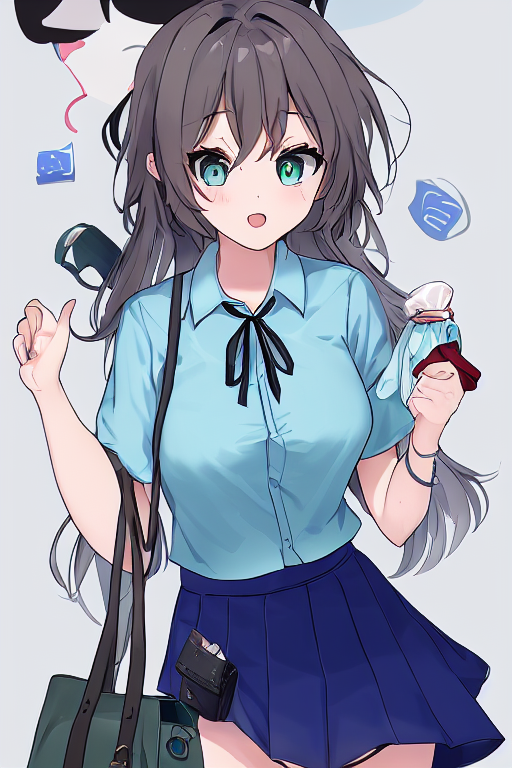

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['_ hair long _ hair looking _ at _ viewer neck _ ribbon pleated _ skirt ribbon shirt shirt _ tucked _ in short _ sleeves simple _ background skirt smile solo thighhighs white _ background white _ shirt <|endoftext|>']


  0%|          | 0/50 [00:00<?, ?it/s]

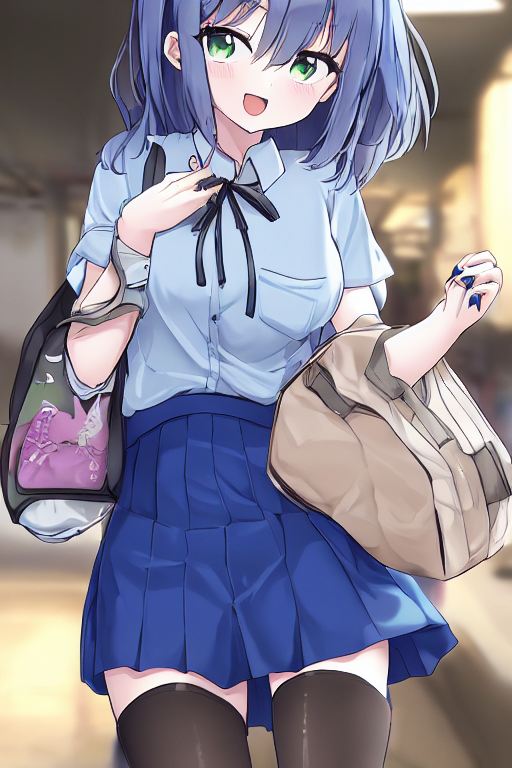

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['_ hair long _ hair looking _ at _ viewer neck _ ribbon pleated _ skirt ribbon shirt shirt _ tucked _ in short _ sleeves simple _ background skirt smile solo thighhighs white _ background white _ shirt <|endoftext|>']


  0%|          | 0/50 [00:00<?, ?it/s]

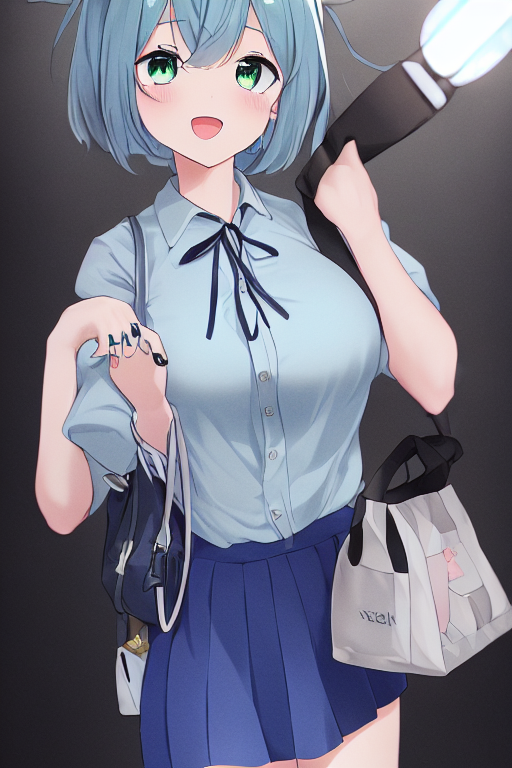

In [ ]:
prompt = "dohyo123123 blue_archive nonomi_(blue_archive) highres 1girl :d alternate_costume bag black_thighhighs blue_ribbon blue_skirt breasts collared_shirt feet_out_of_frame green_eyes grey_bag hair_between_eyes hair_rings halo holding holding_bag large_breasts light_brown_hair long_hair looking_at_viewer neck_ribbon pleated_skirt ribbon shirt shirt_tucked_in short_sleeves simple_background skirt smile solo thighhighs white_background white_shirt"
def null_safety(images, **kwargs):
    return images, False
 
 
pipe.safety_checker = null_safety
images = []
for i in range(4):
    with autocast("cuda"):
        image = pipe(prompt, height=768, width=512, guidance_scale=7.5).images[0] 
        images.append(image)
    image_name = prompt.replace(' ', '_') + str(i) + ".png"
    # image.save(image_name)
    display(image)


In [ ]:
for i, im in enumerate(images[:]):
    # im.save(f"/content/drive/MyDrive/Colab Notebooks/stdf/hutao{i+m}.png")
    im.save(f"/content/drive/MyDrive/stdf/test{i+m}.png")
m += i+1
m

In [ ]:
m=1

In [ ]:
for img in images:
  display(img)

In [ ]:
# ライブラリ・インストール
! pip install transformers gradio scipy ftfy "ipywidgets>=7,<8" datasets
 
# githubからコードをコピーしインストール
! git clone https://github.com/huggingface/diffusers.git
! pip install git+https://github.com/huggingface/diffusers.git
%cd diffusers
 
# 関数定義（追加）
import PIL
from PIL import Image
import numpy as np
 
def preprocess(image):
    w, h = image.size
    w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32
    image = image.resize((w, h), resample=PIL.Image.LANCZOS)
    image = np.array(image).astype(np.float32) / 255.0
    image = image[None].transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return 2.*image - 1.

In [ ]:
from huggingface_hub import notebook_login
 
# ログイン
notebook_login()

In [ ]:
import gradio as gr
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler
import requests
from PIL import Image
from io import BytesIO
from IPython.display import clear_output ###
 
#from examples.inference.image_to_image import StableDiffusionImg2ImgPipeline, preprocess
from diffusers import StableDiffusionImg2ImgPipeline
 
lms = LMSDiscreteScheduler(
    beta_start=0.00085, 
    beta_end=0.012, 
    beta_schedule="scaled_linear"
)
 
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    scheduler=lms,
    revision="fp16", 
    use_auth_token=True
).to("cuda")
 
pipeimg = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to("cuda")
 
 
 
 
block = gr.Blocks(css=".container { max-width: 800px; margin: auto; }")
 
num_samples = 2
 
def infer(prompt, init_image, strength):
    if init_image != None:
        init_image = init_image.resize((512, 512))
        init_image = preprocess(init_image)
        with autocast("cuda"):
            images = pipeimg([prompt] * num_samples, init_image=init_image, strength=strength, guidance_scale=7.5)[0]
    else: 
        with autocast("cuda"):
            images = pipe([prompt] * num_samples, guidance_scale=7.5)[0]
 
    return images
 
 
with block as demo:
    gr.Markdown("<h1><center>Stable Diffusion</center></h1>")
    gr.Markdown(
        "Stable Diffusion is an AI model that generates images from any prompt you give!"
    )
    with gr.Group():
        with gr.Box():
            with gr.Row().style(mobile_collapse=False, equal_height=True):
 
                text = gr.Textbox(
                    label="Enter your prompt", show_label=False, max_lines=1
                ).style(
                    border=(True, False, True, True),
                    rounded=(True, False, False, True),
                    container=False,
                )
                btn = gr.Button("Run").style(
                    margin=False,
                    rounded=(False, True, True, False),
                )
        strength_slider = gr.Slider(
            label="Strength",
            maximum = 1,
            value = 0.75         
        )
        image = gr.Image(
            label="Intial Image",
            type="pil"
        )
               
        gallery = gr.Gallery(label="Generated images", show_label=False).style(
            grid=[2], height="auto"
        )
        text.submit(infer, inputs=[text,image,strength_slider], outputs=gallery)
        btn.click(infer, inputs=[text,image,strength_slider], outputs=gallery)
 
    gr.Markdown(
        """___
   <p style='text-align: center'>
   Created by CompVis and Stability AI
   <br/>
   </p>"""
    )
 
clear_output() ###
demo.launch(debug=True)
